In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from google.colab import files

uploaded = files.upload()


Saving social media influencers - instagram.csv to social media influencers - instagram.csv
Saving social media influencers - tiktok.csv to social media influencers - tiktok (1).csv
Saving social media influencers - youtube.csv to social media influencers - youtube.csv


In [16]:
import pandas as pd

# Assuming you've uploaded the files with the same names
df_t = pd.read_csv('social media influencers - tiktok.csv')
df_i = pd.read_csv('social media influencers - instagram.csv')
df_y = pd.read_csv('social media influencers - youtube.csv')


In [17]:
df_t.head(3)

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K


In [18]:
df_t.isnull().sum()

Tiktoker name        0
Tiktok name          2
Subscribers count    0
Views avg.           0
Likes avg            0
Comments avg.        0
Shares avg           0
dtype: int64

In [19]:
df_t['Subscribers count'].str[-1].value_counts()

M    797
K    203
Name: Subscribers count, dtype: int64

In [20]:
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [21]:
def change(df,list1):
    for i in list1:
        df['new'+i]=df[i].apply(convert)
        df['new'+i]=df['new'+i].apply(lambda x: "".join(x))
        df['new'+i]=pd.to_numeric(df['new'+i])
        df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
    return df

In [22]:
change(df_t,['Subscribers count'])

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,newSubscribers count
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K,221700.0
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K,22200000.0
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K,2100000.0
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K,135400000.0
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K,11400000.0
...,...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,4M,2.2M,351.3K,957,195,4000000.0
996,bellaretamosa,bella,5.1M,2.5M,340.4K,901,145,5100000.0
997,tunico80,🌠Antonio Tonon🌠,5.8M,1M,206.8K,2K,2.1K,5800000.0
998,armon.warren,Armoney,1.2M,1.9M,300.8K,904,630,1200000.0


**TOP 10 most followed celebrity on Tiktok**


In [23]:
df_t.sort_values(by='newSubscribers count',ascending=False,ignore_index=True).iloc[0:10,[1,2]]

,Tiktok name,Subscribers count
0,charli d’amelio,135.4M
1,Khabane lame,135.2M
2,Bella Poarch,88.5M
3,Addison Rae,87.3M
4,Will Smith,67.4M
5,Kimberly Loaiza,61M
6,dixie,57.2M
7,Loren Gray,54.3M
8,Dominik,50.7M
9,Kris HC,43.3M


**now analyse instagram and youtube data set**

In [24]:
df_i.head(2)
#Instagram Dataset

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K


In [25]:
df_y.head(2)
#Youtube Dataset

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN


**renaming some columns in instagram dataframe for convenience**

In [26]:
df_i.rename({'category_1':'Category','Audience country(mostly)':'Audience Country'},axis=1,inplace=True)

df_y.rename({'Subscribers':'Followers',},axis=1,inplace=True)

In [27]:
df_i.head(2)

,Influencer insta name,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K


In [28]:
df_y.head(2)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN


In [29]:
df_i.isnull().sum()

Influencer insta name         0
instagram name               21
Category                    108
category_2                  713
Followers                     0
Audience Country             14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [30]:
df_y.isnull().sum()


youtuber name         0
channel name          0
Category            277
Followers             0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

In [31]:
df_i.drop_duplicates(subset=['Influencer insta name'],inplace=True)

In [32]:
df_i.shape


(997, 8)

In [33]:
df_i.drop(labels=['Influencer insta name','Authentic engagement\r\n'],axis=1,inplace=True)



In [34]:
df_i.head(2)


,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K


In [35]:
li=['Followers','Engagement avg\r\n']


In [36]:
change(df_i,li)


,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n,newFollowers,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K,12700000.0,542300.0
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K,18800000.0,377900.0
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M,13500000.0,1400000.0
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M,11100000.0,3100000.0
...,...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,8.6M,136100000.0,8600000.0
996,zidane,Sports with a ball,NaN,31.2M,Spain,744.1K,31200000.0,744100.0
997,KAI,Music,NaN,13.9M,Indonesia,1.6M,13900000.0,1600000.0
998,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,885.5K,8200000.0,885500.0


Engagement rate : the Percentage of Followers who really engages with the content posted by Influencers
Why ER is so Important?
1-good ER means your content is making an impact on audience(they really like you)
2- The higher the engagement ,the more likely it is that the content will be boosted in the newsfeed and attracting more eyes.bold text


In [37]:
#Engagement Rate formula:
#ER=(Engagement Average/total Followers)*100

In [40]:
df_i['Engagement Rate']=np.round((df_i['newEngagement avg\r\n']/df_i['newFollowers'])*100,3)

In [41]:
print(df_i['Followers'].str[-1].unique())

['M']


In [42]:
# for convenice
df_i['newFollowers']=df_i['newFollowers']/1000000

In [43]:
df_i.drop(labels=['Engagement avg\r\n','newEngagement avg\r\n'],axis=1,inplace=True)

In [44]:
df_i.head(5)

,instagram name,Category,category_2,Followers,Audience Country,newFollowers,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,18.8,2.010
3,Joy,Lifestyle,NaN,13.5M,Indonesia,13.5,10.370
4,Jaehyun,NaN,NaN,11.1M,Indonesia,11.1,27.928


TOP 15 most followed celebrity on instagram

In [45]:
df_i.sort_values(by='newFollowers',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]

,instagram name,Category,Followers,Engagement Rate
0,Instagram,Photography,487.2M,0.096
1,Cristiano Ronaldo,Sports with a ball,419.6M,1.668
2,Kylie 🤍,Fashion,323.3M,3.805
3,Leo Messi,Sports with a ball,315.4M,1.680
4,Selena Gomez,Music,308.2M,1.428
5,therock,Cinema & Actors/actresses,307M,0.129
6,Ariana Grande,Music,302.3M,1.356
7,Kim Kardashian,Fashion,296.4M,0.978
8,Beyoncé,Music,246.9M,1.499
9,Khloé Kardashian,Clothing & Outfits,230.2M,0.521


<Axes: title={'center': 'Top 15 most followed celebrity on instagram'}, xlabel='newFollowers', ylabel='instagram name'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


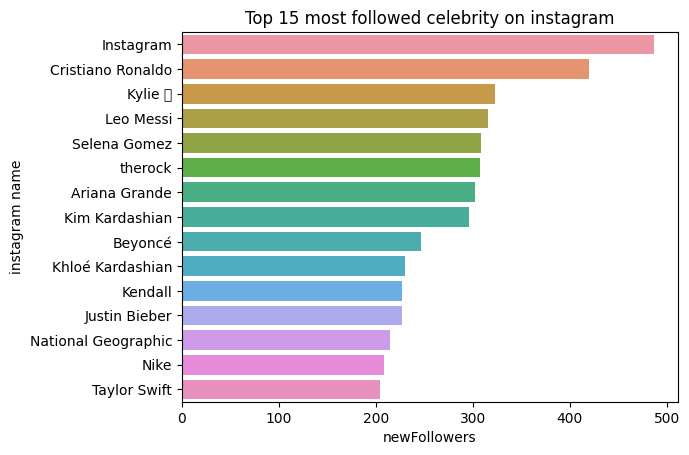

In [46]:
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='instagram name',x='newFollowers',data=df_i.sort_values(by='newFollowers',ascending=False).head(15))

In [47]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']

In [48]:
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

TOP categories followed on instagram(POPULAR CATEGORIES ON INSTAGRAM)



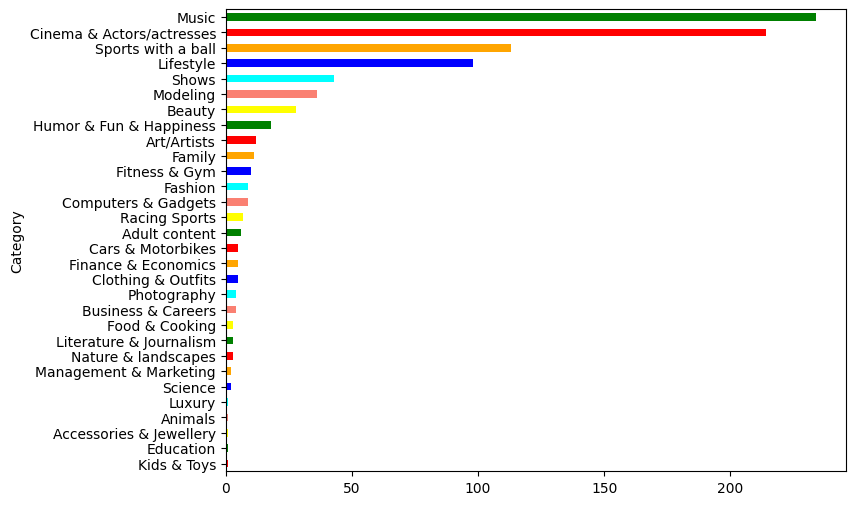

In [49]:
plot(df_i)

TOP categories followed on YOUTUBE(POPULAR CATEGORIES ON YOUTUBE)

In [50]:
df_y.drop_duplicates(subset=['channel name'],inplace=True)

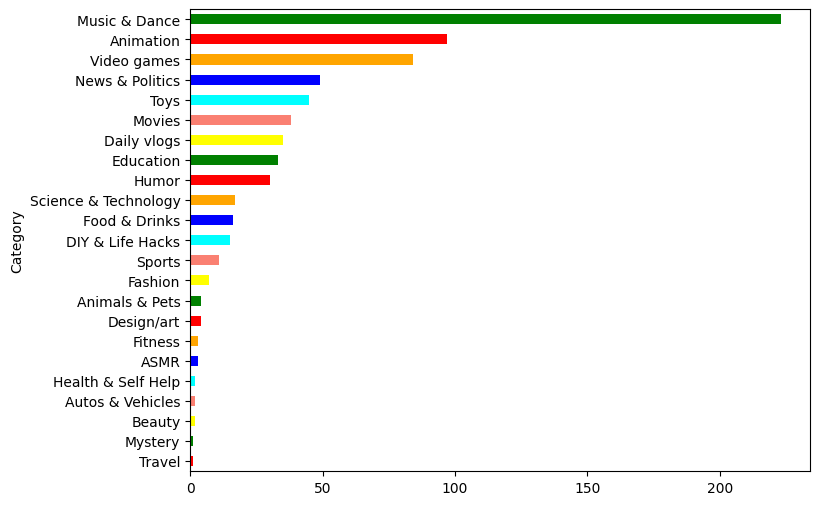

In [51]:
plot(df_y)

conclusion:
1-some categories are not on both plateforms
2-some categories are more popular on instagram than youtube and vice versa
3-Example-EDUCATION and Animation is more popular on YOUTUBE the INSTAGRAM

In [52]:
#Decide That where you want to make ads

In [53]:
def plot_c(df):
    plt.figure(figsize=(10,8))
    plt.xlabel('number of times category occured')
    df['Audience Country'].value_counts().sort_values().plot.barh(color=pallete)

TOP consumer countries of the influencers content on INSTAGRAM

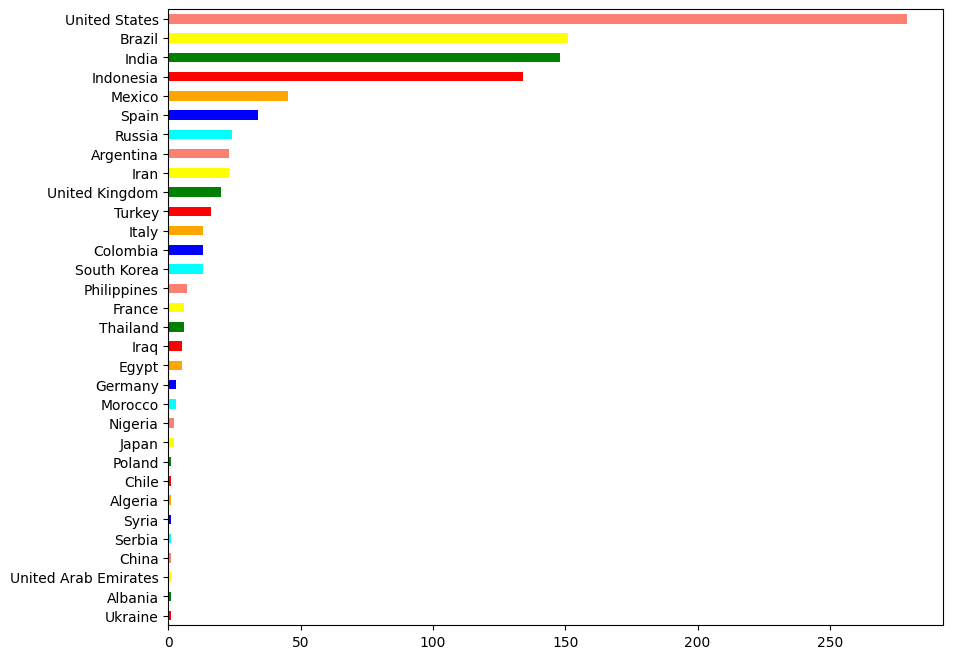

In [54]:
plot_c(df_i)

TOP consumer countries of the influencers content on YOUTUBE

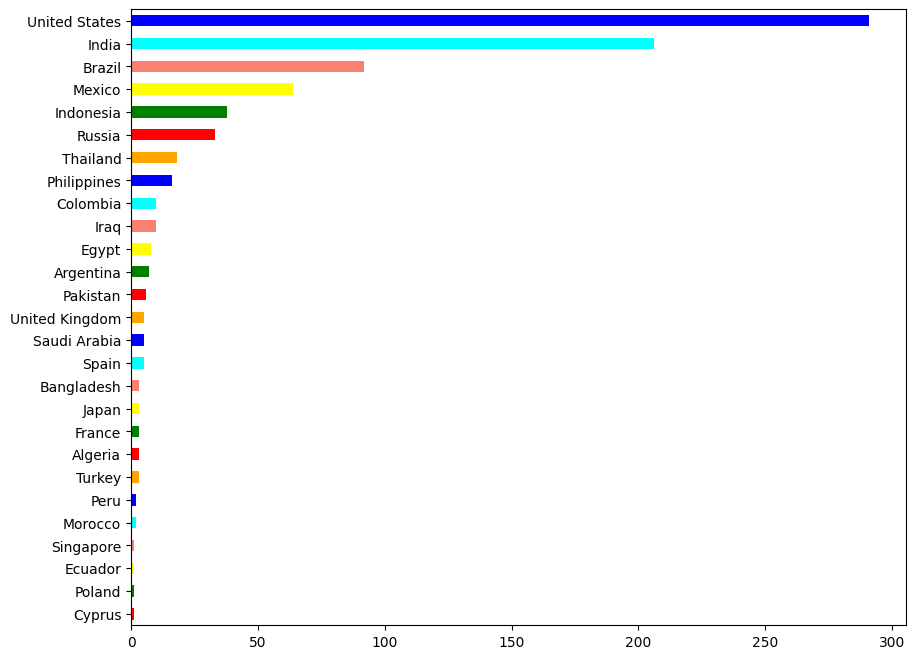

In [55]:
plot_c(df_y)

(TARGET COUNTRY FOR BUISNESS)Checking the demand for categories by Country wise)

for understanding that where is the demand of product


In [56]:
def demand(data,category):
    return data[data['Category']==category]['Audience Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

<Axes: >

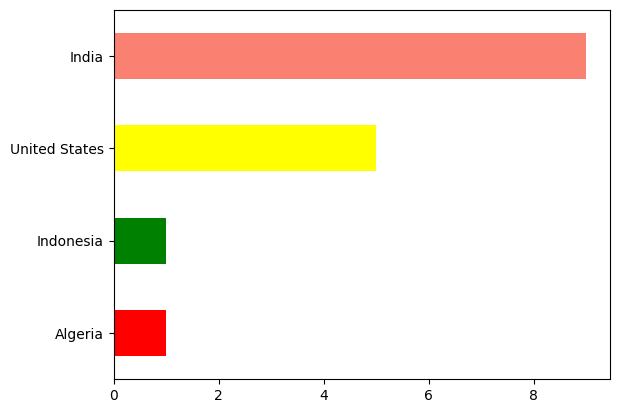

In [57]:
demand(df_y,'Education')

<Axes: >

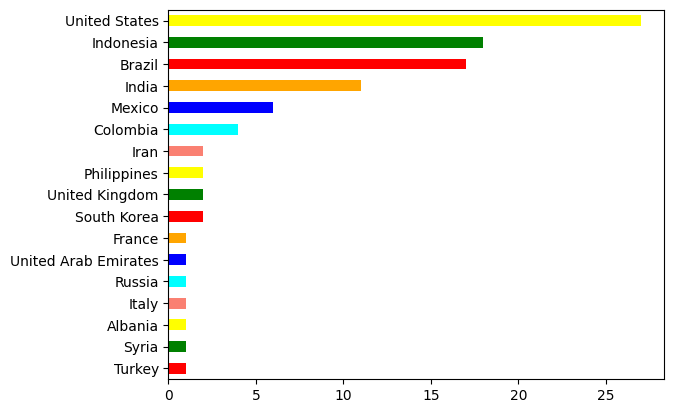

In [58]:
demand(df_i,'Lifestyle')

1-for a particular category we can choose the country where a huge audience is liking that particular category .
for example if you want to make an advertisement of educational app then you can choose India

In [59]:
#TOP 15 most followed channels on youtube

In [60]:
df_y.iloc[0:10,[1,2,3]]
# youtube dataset is already sorted

,channel name,Category,Followers
0,T-Series,Music & Dance,212.1M
1,Cocomelon - Nursery Rhymes,Education,132.1M
2,SET India,NaN,130.4M
3,PewDiePie,Animation,111.4M
4,MrBeast,Video games,92.5M
5,✿ Kids Diana Show,Animation,92.4M
6,Like Nastya,Animation,90.1M
7,WWE,Video games,86.9M
8,Zee Music Company,Music & Dance,82.7M
9,Vlad and Niki,Toys,80.4M


In [61]:
ly=['Followers','avg views', 'avg likes', 'avg comments']

if you want to go with mini followers for advertisement on instagram

In [62]:
df_i['newFollowers'].describe()

count    997.000000
mean      25.539619
std       40.586338
min        2.600000
25%        9.000000
50%       14.600000
75%       26.500000
max      487.200000
Name: newFollowers, dtype: float64

In [63]:
df_i['newFollowers'].quantile(0.94)


61.62399999999999

I am taking 60M as a threshold means for instagram celebrity havning above 60M followers are considerd to be mega celebrity


In [64]:
df_i.head(2)

,instagram name,Category,category_2,Followers,Audience Country,newFollowers,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,12.7,4.270


if you want to make ads by mini influencers

In [65]:
def for_mini_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']<60]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]


In [66]:
for_mini_followers_instagram('India','Music')

,instagram name,Followers,Engagement Rate
705,Olivia Rodrigo,22.9M,15.284
992,Zayn Malik,44.9M,12.918
242,djsnake,9.1M,4.721
118,Bebe Rexha,10.8M,3.028
876,Tamannaah Bhatia,15.9M,2.528
216,Darshan Raval #Goriye,14.8M,1.683
604,marshmello,29.2M,1.392
581,Madhuri Dixit,30.6M,1.121
824,shreyaghoshal,23.7M,0.601
333,Guru Randhawa,31.5M,0.430


if you want to make ads by mega influencers

In [67]:
def for_mega_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']>60]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

In [68]:
for_mega_followers_instagram('India','Music')

,instagram name,Followers,Engagement Rate
818,Shakira,71.9M,1.317
670,Neha Kakkar (Mrs. Singh),68.5M,1.131
458,Justin Bieber,227M,0.281


In [69]:
for_mini_followers_instagram('India','Beauty')

,instagram name,Followers,Engagement Rate
883,Tejasswi Prakash,5.5M,9.335
757,Rashmika Mandanna,30M,6.667
803,Samantha,22.9M,3.063
865,Sunny Leone,51.5M,0.819


In [70]:
for_mini_followers_instagram('India','Shows')

,instagram name,Followers,Engagement Rate
786,𝐑𝐨𝐡𝐢𝐭 𝐙𝐢𝐧𝐣𝐮𝐫𝐤𝐞 ~ 𝐫𝐞𝐚𝐜𝐭𝐢𝐨𝐧𝐛𝐨𝐢 💫,21.2M,5.189
73,ANNE-MARIE,9.2M,3.691
108,Awez Darbar,17.8M,3.137
239,Divyanka Tripathi Dahiya,18.9M,0.890


In [71]:
# category(df_i,'Sports with a ball')

In [72]:
 for_mini_followers_instagram('India','Sports with a ball')

,instagram name,Followers,Engagement Rate
653,Nani,4.8M,11.646
836,Smriti Mandhana,5.9M,10.808
825,Shreyas Iyer,5.9M,9.758
774,Rishabh Pant,6.1M,9.666
752,KL Rahul👑,11.9M,6.626
343,Hardik Himanshu Pandya,20.6M,5.340
785,Rohit Sharma,23.3M,5.150
15,AB de Villiers,17.2M,3.581
222,David Warner,9.1M,3.074
822,Shikhar Dhawan,10.8M,2.763


In [73]:
for_mega_followers_instagram('India','Sports with a ball')


,instagram name,Followers,Engagement Rate
943,Virat Kohli,188.1M,1.808
203,Cristiano Ronaldo,419.6M,1.668


In [74]:
df_y.head(3)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21


In [75]:
df_y.isnull().sum()

youtuber name         0
channel name          0
Category            276
Followers             0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

Due to nan values we have to remove some data .but in reality you can collect this data easily

In [76]:
df_y.dropna(axis=0,how='any',subset=['avg likes','avg comments']).isnull().sum()

youtuber name         0
channel name          0
Category            215
Followers             0
Audience Country      0
avg views             0
avg likes             0
avg comments          0
dtype: int64

In [77]:
df_y.dropna(axis=0,how='any',subset=['avg likes','avg comments'],inplace=True)

In [78]:
change(df_y,ly)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments,newFollowers,newavg views,newavg likes,newavg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000.0,323700.0,9800.0,290.0
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,130400000.0,23600.0,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000.0,1400000.0,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000.0,30600000.0,1700000.0,67700.0
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000.0,76600.0,2800.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K,9200000.0,1400000.0,110100.0,2500.0
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636,9200000.0,243800.0,30700.0,636.0
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874,9200000.0,296000.0,10200.0,874.0
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58,9200000.0,15200.0,854.0,58.0


In [79]:
df_y[df_y['Audience Country']=='Spain']['Category'].value_counts()


Video games         2
Animation           1
DIY & Life Hacks    1
Name: Category, dtype: int64

In [80]:
df_y[df_y['Audience Country']=='Brazil'].groupby('Category').get_group('Animation')


,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments,newFollowers,newavg views,newavg likes,newavg comments
249,RobinHoodGamer1,Robin Hood Gamer,Animation,18.4M,Brazil,1.3M,59K,1.1K,18400000.0,1300000.0,59000.0,1100.0
265,INCRÍVEL,INCRÍVEL,Animation,17.8M,Brazil,32.5K,1.8K,47,17800000.0,32500.0,1800.0,47.0
493,TazerCraft,TazerCraft,Animation,13.3M,Brazil,352.8K,26.8K,532,13300000.0,352800.0,26800.0,532.0
584,jazzghost1,Jazzghost,Animation,12.3M,Brazil,758.7K,55.9K,2K,12300000.0,758700.0,55900.0,2000.0
672,FelipeViktor,LipaoGamer,Animation,11.3M,Brazil,164.5K,12.4K,168,11300000.0,164500.0,12400.0,168.0
945,BETO GAMER,BETO GAMER,Animation,9.5M,Brazil,448.9K,28.1K,372,9500000.0,448900.0,28100.0,372.0
999,BRKsEDU,BRKsEDU,Animation,9.2M,Brazil,112.3K,9.8K,246,9200000.0,112300.0,9800.0,246.0


In [81]:
df_y['Engagement rate']=round(((df_y['newavg comments']+df_y['newavg likes']+df_y['newavg views'])/df_y['newFollowers'])*100,3)

In [82]:
df_y.head(2)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments,newFollowers,newavg views,newavg likes,newavg comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000.0,323700.0,9800.0,290.0,0.157
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,130400000.0,23600.0,314.0,21.0,0.018


In [83]:
df_y.columns

Index(['youtuber name', 'channel name', 'Category', 'Followers',
       'Audience Country', 'avg views', 'avg likes', 'avg comments',
       'newFollowers', 'newavg views', 'newavg likes', 'newavg comments',
       'Engagement rate'],
      dtype='object')

In [84]:
# for convenince
df_y['newFollowers']=df_y['newFollowers']/1000000

In [85]:
df_y.drop(labels=['avg views', 'avg likes', 'avg comments','newavg views', 'newavg likes', 'newavg comments',
       ],axis=1,inplace=True)

In [86]:
df_y['newFollowers'].describe()

count    786.000000
mean      17.016921
std       13.593720
min        9.200000
25%       10.700000
50%       13.000000
75%       17.600000
max      212.100000
Name: newFollowers, dtype: float64

In [87]:
df_y['newFollowers'].quantile(0.90)

28.25

Threshold can be decided by your choice
here i am cosidering that who have >30M subscribers that is coming the category of mega celebrity


In [88]:
df_y.head(1)


,youtuber name,channel name,Category,Followers,Audience Country,newFollowers,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,212.1,0.157


In [89]:
def for_mini_followers_youtube(coun,cat):
    df1=df_y[df_y['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']<=30]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]


In [90]:
 df_y.groupby('Category')['Audience Country'].first()

Category
ASMR                           Mexico
Animals & Pets          United States
Animation               United States
Autos & Vehicles               Brazil
Beauty                  United States
DIY & Life Hacks               Russia
Daily vlogs                    Mexico
Design/art              United States
Education                       India
Fashion                 United States
Fitness                 United States
Food & Drinks           United States
Health & Self Help      United States
Humor                   United States
Movies                          India
Music & Dance                   India
Mystery                 United States
News & Politics                 India
Science & Technology           Brazil
Sports                         Brazil
Toys                           Brazil
Travel                   Saudi Arabia
Video games             United States
Name: Audience Country, dtype: object

In [91]:
for_mini_followers_youtube('United States','Music & Dance')

,youtuber name,Followers,Engagement rate
860,Juice WRLD,10M,79.277
914,Prince Royce,9.6M,74.629
717,YoungBoy Never Broke Again,10.9M,72.458
861,jordanmatter,10M,50.495
607,Migosatl,11.9M,28.876
625,AvrilLavigne,11.7M,25.102
656,Davie504,11.5M,19.094
711,YMWayneCarter,11.1M,18.963
535,twentyonepilots,12.7M,14.654
146,jypentertainment,24.2M,11.461


In [92]:
def for_mega_followers_youtube(coun,cat):
    df1=df_y[df_y['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']>30]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]


In [93]:
for_mega_followers_instagram('Brazil','Sports with a ball')

,instagram name,Followers,Engagement Rate
676,NJ 🇧🇷,172M,1.337
789,Ronaldo de Assis Moreira,65.1M,0.487
177,UEFA Champions League,91.4M,0.377


In [94]:
df_y['Category'].value_counts()

Music & Dance           184
Video games              79
Animation                56
News & Politics          45
Movies                   33
Humor                    29
Daily vlogs              27
Toys                     20
Science & Technology     17
Food & Drinks            15
Education                14
DIY & Life Hacks         14
Sports                   11
Fashion                   7
Animals & Pets            4
Fitness                   3
ASMR                      3
Design/art                3
Beauty                    2
Health & Self Help        2
Autos & Vehicles          1
Mystery                   1
Travel                    1
Name: Category, dtype: int64

In [95]:
for_mega_followers_youtube('India','Movies')

,youtuber name,Followers,Engagement rate
15,sabtv,64.9M,0.073
